In [24]:
import numpy as np 
from scipy.optimize import newton, fsolve
from matplotlib import pyplot as plt
from math import sqrt, log

In [42]:
ms = 939 #Mev/c2 
mv = 939
M=ms
gs2 = 267.1 
gv2 = 195.9
hbarc = 197.3269 
c = 3e8
Ef = lambda kf, Mstar : np.sqrt(kf**2 + Mstar**2) 

In [39]:
def Mstar_eq(Mstar, kf, gamma): 
    Ef = np.sqrt(kf**2 + Mstar**2) 
    return Mstar - M + (gs2*gamma*Mstar)/(ms**2*4*np.pi**2)*(kf*Ef - Mstar**2*np.log((kf+Ef)/Mstar))

In [22]:
Mstar_eq(M, hbarc, 4)

155.18599579917003

[938.8427998224677, 937.7428996197606, 934.7601293397815, 928.9595642306812, 919.4148521560246, 905.2129670184952, 885.4618316784891, 859.303429947147, 825.9373795301073, 784.664778169372, 734.9721384807493, 676.6951014444788, 610.3349331627347, 537.6221242716246, 462.2643602918357, 390.0909403829112, 327.0838715225885, 276.1490152934449, 236.50703771569653, 205.75008727453425, 181.52492070714896, 162.04500897664707, 146.0562610247526, 132.6909690782622, 121.34238740398682, 111.57778803733261, 103.08160876252406, 95.61862429487618, 89.00986004812727, 83.11656911599438, 77.82936170847167, 73.06068075755967, 68.73949130897871, 64.80746265666262, 61.21617592536774, 57.92504871985299, 54.89976967556429, 52.1111013406758, 49.53395306151643, 47.14665452366679, 44.93038033078362, 42.86868963675195, 40.94715440111932, 39.15305662278178, 37.475139785831054, 35.903403301358104, 34.428931340737925, 33.043749397690135, 31.740703374464488]


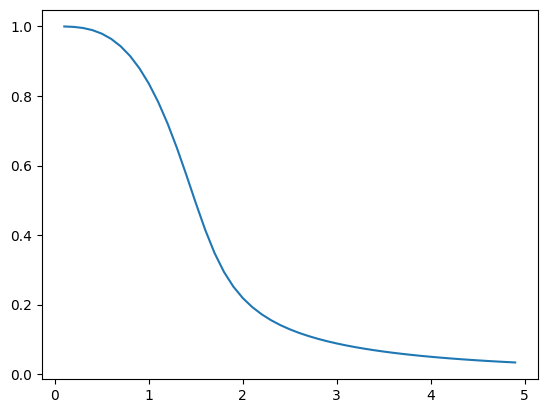

In [40]:
kfhcs = np.arange(0.1, 5.0, .1)
gammas = []
Mstars = []
for kfhc in kfhcs:
    Mstars.append(fsolve(Mstar_eq, x0=0.2*M, args=(kfhc*hbarc, 4))[0])
print(Mstars)
Mstars = np.array(Mstars)
plt.plot(kfhcs, Mstars/M)

[938.9213999094917, 938.3714493632136, 936.8800531752297, 933.9796661878869, 929.2067229824463, 922.103376340156, 912.219818779816, 899.1176080201072, 882.3746499605596, 861.5928767710951, 836.4102969645444, 806.5201464963584, 771.7015352947792, 731.8683716370756, 687.1459174355931, 637.9841691324436, 585.305269681229, 530.6399667125828, 476.1261213825033, 424.19349583818456, 376.9324354350715, 335.5169320524883, 300.10039447232896, 270.1444919365826, 244.83028160314203, 223.3287991709846, 204.91840370705006, 189.01163368400384, 175.14384016644618, 162.9509554555031, 152.1475112165771, 142.5083211043215, 133.85421376819667, 126.04123335169874, 118.95254906759415, 112.49240039928935, 106.58154746080417, 101.15382915863422, 96.15353798583877, 91.53339983784616, 87.25300519174924, 83.27757970473095, 79.5770122143241, 76.12507962756906, 72.89882370631493, 69.87804602504391, 67.0448956174232, 64.38352989790505, 61.87983395103794]


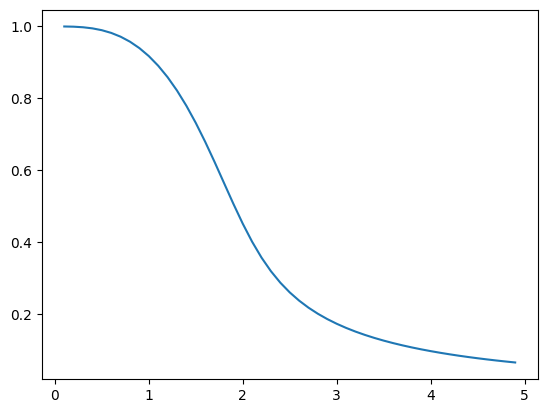

In [41]:
kfhcs = np.arange(0.1, 5.0, .1)
Mstars = []
for kfhc in kfhcs:
    Mstars.append(fsolve(Mstar_eq, x0=0.2*M, args=(kfhc*hbarc, 2))[0])
print(Mstars)
Mstars = np.array(Mstars)
plt.plot(kfhcs, Mstars/M)

921964466511.2374
3459918894850.6196


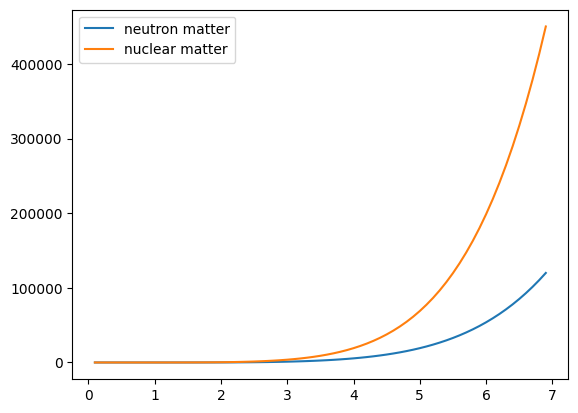

In [47]:
kfhcs = np.arange(0.1, 7.0, .1)
gammas = [2,4]
for gamma in gammas:
    Ps = []
    for kfhc in kfhcs:
        kf = kfhc*hbarc
        Mstar = fsolve(Mstar_eq, x0=0.2*M, args=(kf, 2))[0]
        rhoB = gamma/(6*np.pi**2)*kf**3 
        Ef = np.sqrt(kf**2+Mstar**2)
        P = gv2*rhoB**2/(2*mv**2) - (ms**2/(2*gs2))*(M-Mstar)**2 + (gamma/(12*np.pi**2))*(kf*Ef*(2*kf**2 - 3*Mstar**2) + 3*Mstar**4*np.log((kf+Ef)/Mstar))
        Ps.append(P)
    print(P)
    Ps = np.array(Ps)
    plt.plot(kfhcs, Ps/(hbarc**3))
plt.legend(["neutron matter", "nuclear matter"])
plt.show()